*Managerial Problem Solving*

# Tutorial 8 - Statistics and Descriptive Analytics

Toni Greif<br>
Lehrstuhl für Wirtschaftsinformatik und Informationsmanagement

SS 2019

We uploaded a collection of R visualization tasks to WueCampus *(MPS T07 2019 UpToYou)*, which you can do on your own. If you have any questions, you can ask them in the next tutorials or in the Q&A session on July 25.

### Chebyshev’s Theorem
For any data set, the proportion of values that lie within $k\ (k>1)$ standard deviations of the mean is at least $1−\frac{1}{𝑘^2}$.

For normally distributed data sets we can apply tighter formulations:
- $68 \%$ of observations fall within one standard deviation around the mean $(x\mp s)$
- $95 \%$ of observations fall within two standard deviations around the mean $(x\mp 2s)$
- $99.7 \%$ of observations fall within three standard deviations around the mean $(x\mp 3s)$

### Process Capability Index

$\Rightarrow \text{total variation} \approx 6\sigma$

To measure how well a manufacturing process can achieve specifications, take a sample of output, measure dimensions, compute the total variation using the third empirical rule. Compare results to specifications using:

$$ C_p = \frac{\text{upper specification} - \text{lower specification}}{\text{total variation}}$$

In [55]:
library(tidyverse)
library(e1071)
file_path = 'data/T08/data1.csv'
data <- read.csv2(file_path , sep = ",")
data$value = as.numeric(as.character(data$value))

### Example
The file data1.csv provides a subset of normally distributed turnaround times for an intensive care unit lab process. The lower specification limit for this process is 20 minutes and the upper specification limit is 30 minutes. The nominal value for this service is 25 minutes. In order to assess the process performance, we can visualize the observations.

In [80]:
data %>% head(3)

day value   
1 1   22.95284
2 2   24.56925
3 3   25.48192

Plot the time series as well as the upper and lower bounds.

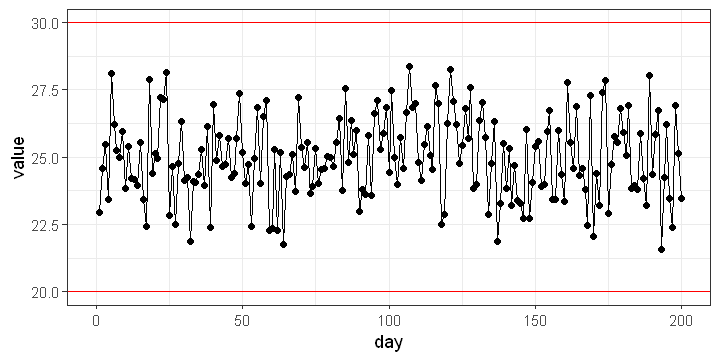

In [67]:
options(repr.plot.width=6, repr.plot.height=3)

upperBound <- 30
lowerBound <- 20

data %>% 
        

Plot a histogram to visualize the distribution of the data.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


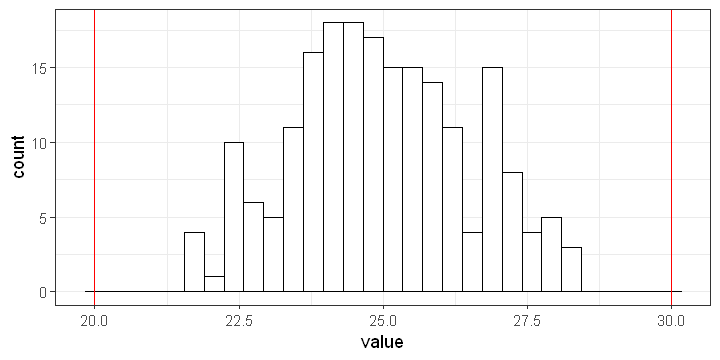

In [66]:
options(repr.plot.width=6, repr.plot.height=3)

data %>%
        

**Location Measures:** Mean, Median

In [96]:
mean <- mean(data$value)
mean
median <- median(data$value)
median

[1] 24.97317

[1] 24.85668

Why is mode not a meaningful measure here? Use code to justify 

[1] 0

**Dispersion Measures:**
Range, Variance, Standard Deviation

In [88]:
range(data$value)
var(data$value)
sd(data$value)

[1] 21.58293 28.38512

[1] 2.366397

[1] 1.53831

**Standardized random variables**

To report dispersion in a standardized form one can apply a standardization scheme such that the standardized data has mean 0 and standard deviation 1.


$$ z_i=\frac{x_i -\bar{x}}{s}$$

In [92]:
scaled_value <- scale(data$value)
mean(scaled_value)
sd(scaled_value)

[1] 3.323259e-16

[1] 1



**Skewness and Kurtosis**

In [111]:
skewness(data$value)
print("right-skewed")
kurtosis(data$value)
print("flat-peaked")

[1] 0.08153312

[1] "right-skewed"


[1] -0.6491284

[1] "flat-peaked"


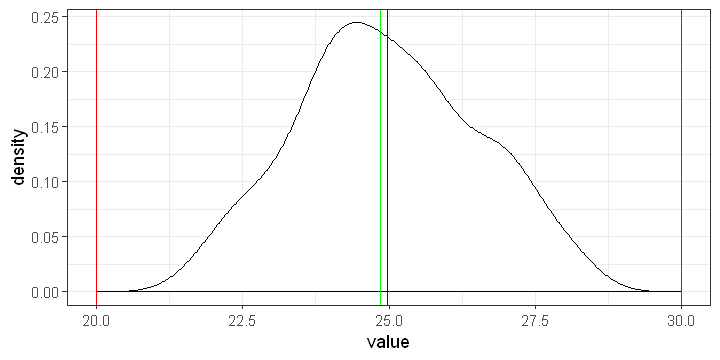

In [112]:
options(repr.plot.width=6, repr.plot.height=3)

data %>%
        ggplot(aes(x=value)) + 
        geom_density(color="black", fill="White") + 
        geom_vline(aes(xintercept=lowerBound), color="red") + 
        geom_vline(aes(xintercept=upperBound), color="red") + 
        geom_vline(aes(xintercept=mean), color="blue") + 
        geom_vline(aes(xintercept=median), color="green") + 
        theme_bw() 

### Process Performance
While visualizations are well suited to get an idea of the process quality, more elaborate methods are needed to measure process performance. The process capability ratio $C_p$ is used to evaluate processes that are symmetric distributed between the upper and lower specifications and calculated as following: 

$$ C_p = \frac{\text{upper specification} - \text{lower specification}}{\text{total variation}}$$

Determine the process capability by calculating the process capability ratio (Cp).

(*The lower specification limit for this process is 20 minutes and the upper specification limit is 30 minutes.
The nominal value for this service is 25 minutes.*)

[1] 1.08344

Another common method to evaluate process performance is the n-sigma approach. Thereby, the distance between the nominal service time and the bounds is measured in numbers of standard deviations (see Chebyshev’s Theorem and Empirical Rules).
The manager of the lab wants to know if the process has one-sigma, two-sigma, three-sigma, four-sigma or five-sigma performance.

[1] 3.250321

[1] -3.250321

What percentage of turnaround times lies within the limits of the process? Provide an approximation using the empirical rule as well as a lower bound using Chebyshev’s Theorem. 

[1] 0.9973002

[1] 0.9053254

Proportion of turnaround times within the limits of the process:

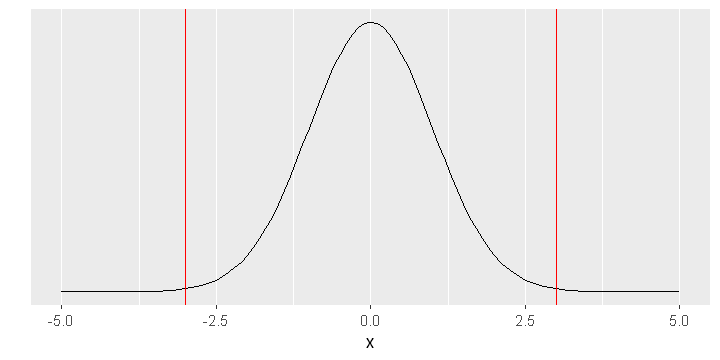

In [79]:
ggplot(data = data.frame(x = c(-5, 5)), aes(x)) +
        stat_function(fun = dnorm, n = 101, args = list(mean = 0, sd = 1)) +
        geom_vline(aes(xintercept=3), color="red") + 
        geom_vline(aes(xintercept=-3), color="red") + 
        ylab("") +
        scale_y_continuous(breaks = NULL)

Regulatory issues require the lab to achieve six-sigma process performance. To achieve this goal, the process standard deviation needs to be improved.
What is the new $\sigma$? (Assume constant bounds)

[1] 0.8333333

[1] 50

## Random Sampling from Probability Distributions

A random variable is a numerical description of the outcome of an experiment

- A discrete random variable is one for which the number of possible outcomes can be counted
- A continuous random variable has outcomes over one or more continuous intervals of real numbers

A probability distribution is a characterization of the possible values that a random variable may assume along with the probability of assuming these values.

<img src="images/Simulation.png" style="width:60%; float:center">

- Many application in Business Analytics require random samples from specific probability distributions.
- For example, cumulative discounted cash flow can be described using probability distributions for sales, sales growth rate, operating expenses, and inflation factors (all uncertain variables).
- Random numbers are the basis for generating random samples from probability distributions.
    - In most computer programs, default random numbers are uniformly distributed over [0;1]


In [ ]:
?runif

In [101]:
runif(5, 0, 1)

[1] 0.2797560 0.9382981 0.8399542 0.1242438 0.6381400

In [109]:
sample(0:1,5,replace=T)

[1] 1 1 0 0 0